# Opx-Liq Matching
- This notebook demonstrates how Opxs can be matched to all possible liquids, including various equilibrium tests. 
- Users should first go through the example Opx_Liq_Thermobarometry.ipynb
- You can download the excel spreadsheet here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Opx_and_Opx_Liq_Thermobarometry/Opx_Liq_Example.xlsx

### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

## Loading python things

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Loading Liquids from one sheet

In [3]:
out1=pt.import_excel('Opx_Liq_Example.xlsx', sheet_name="Separate_Liqs")
my_input=out1['my_input']
Liqs=out1['Liqs']
display(Liqs.head())

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,51.1,0.93,17.5,8.91,0.18,6.09,11.50,3.53,0.17,0,0.15,3.8,0.0,0.0,0.0,0.0,Liquid1
1,51.5,1.19,19.2,8.70,0.19,4.98,10.00,3.72,0.42,0,0.14,6.2,0.0,0.0,0.0,0.0,Liquid2
2,59.1,0.54,19.1,5.22,0.19,3.25,7.45,4.00,0.88,0,0.31,6.2,0.0,0.0,0.0,0.0,Liquid3
3,52.5,0.98,19.2,8.04,0.20,4.99,9.64,4.15,0.21,0,0.14,6.2,0.0,0.0,0.0,0.0,Liquid4
4,56.2,0.34,20.4,5.88,0.20,2.58,7.18,6.02,1.02,0,0.23,6.2,0.0,0.0,0.0,0.0,Liquid5


## Loading Opxs from another sheet

In [4]:
out2=pt.import_excel('Opx_Liq_Example.xlsx', sheet_name="Separate_Opxs")
my_input=out2['my_input']
Opxs=out2['Opxs']
display(Opxs.head())

,SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,Sample_ID_Opx
0,55.00,0.34,1.50,11.30,0.24,30.70,0.90,0.01,0,0.19,Opx1
1,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0,0.00,Opx2
2,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0,0.02,Opx3
3,55.15,0.17,1.19,10.21,0.22,29.99,1.66,0.03,0,0.15,Opx4
4,56.32,0.13,1.41,10.17,0.26,30.88,1.05,0.02,0,0.16,Opx5


## Example 1 - Kd equilibrium test using Si content of the liquid
- The default is that Kd is calculated using the Si content of the liquid following Putirka (2008)
- We see that there are only 3 equilibrium matches, e.g. a single Opx with 3 different liquids (Liq1, 3, and 6)

In [5]:
Match1=pt.calculate_opx_liq_press_temp_matching(liq_comps=Liqs, opx_comps=Opxs,
                                        equationT="T_Put2008_eq28a",
                                         equationP="P_Put2008_eq29a")
Match1['All_PTs']

Considering N=5 Opx & N=6 Liqs, which is a total of N=30 Liq-Opx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=3 Opx-Liq matches using the specified filter. N=1 Opx out of the N=5 Opx that you input matched to 1 or more liquids


,Sample_ID_Opx,Sample_ID_Liq,P_kbar_calc,T_K_calc,Delta_Kd_Fe_Mg_Fe2,SiO2_Liq,Kd Eq (Put2008+-0.06),TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,Di_Opx,Mgno_OPX,ID_OPX,ln_Fm2Si2O6_liq,ln_FmAl2SiO6_liq,Kd_Fe_Mg_Fet,Kd_Fe_Mg_Fe2,Ideal_Kd,Mgno_Liq_noFe3,Mgno_Liq_Fe2
0,Opx1,Liquid1,3.327589,1384.287957,0.053295,51.1,Y,0.93,17.5,8.91,...,0.028142,0.82885,0,5.211708,-2.879647,0.251582,0.251582,0.304877,0.549218,0.549218
1,Opx1,Liquid3,1.359126,1287.021849,0.048017,59.1,Y,0.54,19.1,5.22,...,0.028142,0.82885,0,6.070333,-2.627257,0.229167,0.229167,0.277184,0.526025,0.526025
2,Opx1,Liquid6,3.822215,1384.668282,0.053829,51.3,Y,0.93,17.2,8.91,...,0.028142,0.82885,0,5.231702,-2.821164,0.251582,0.251582,0.305411,0.549218,0.549218


## Example 2- Performing calculations at a fixed temp
- Maybe you have an independent constrain on T you trust more than iterating.
- We are saying here, we want to keep matches with Kd=0.29+-0.05

In [6]:
Match1_fixedT=pt.calculate_opx_liq_press_temp_matching(liq_comps=Liqs, opx_comps=Opxs, T=1300,
                                         equationP="P_Put2008_eq29a", Kd_Match=0.29, Kd_Err=0.05)
Av_Matches1_fixedT=Match1_fixedT['Av_PTs']
All_Matches1_fixedT=Match1_fixedT['All_PTs']

Considering N=5 Opx & N=6 Liqs, which is a total of N=30 Liq-Opx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=2 Opx-Liq matches using the specified filter. N=1 Opx out of the N=5 Opx that you input matched to 1 or more liquids


## Example 3 - Performing calculations at a fixed pressure
- As above, now we fix P an just calculate temperature

In [7]:
Match1_fixedT=pt.calculate_opx_liq_press_temp_matching(liq_comps=Liqs, opx_comps=Opxs, 
                                        equationT="T_Put2008_eq28a",
                                         P=5, Kd_Match=0.29, Kd_Err=0.05)
Av_Matches1_fixedT=Match1_fixedT['Av_PTs']
All_Matches1_fixedT=Match1_fixedT['All_PTs']

Considering N=5 Opx & N=6 Liqs, which is a total of N=30 Liq-Opx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=2 Opx-Liq matches using the specified filter. N=1 Opx out of the N=5 Opx that you input matched to 1 or more liquids


## Example 4 - Return all matches to examine distribution of equilibrium tests
- Perhaps we now want to look at the distribution of Kd values in the matches, to work out what might be a reasonable cut off. 
- by stating "return_all_pairs=True", the code doesn't apply any equilibrium filters
- This means we can look at the range of Kd values for all matches
- Red line shows equilibrium filter used above (+-0.06)

Considering 30 Liq-Opx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Finished!


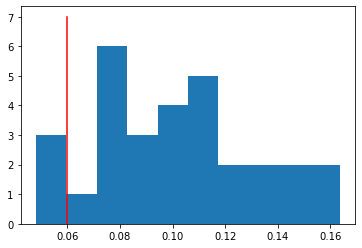

In [12]:
Match2=pt.calculate_opx_liq_press_temp_matching(liq_comps=Liqs, opx_comps=Opxs, 
                                            equationT="T_Put2008_eq28a",
                                         equationP="P_Put2008_eq29a", return_all_pairs=True)
Av_Matches2_fixedT=Match2['Av_PTs']
All_Matches2_fixedT=Match2['All_PTs']
plt.hist(All_Matches2_fixedT['Delta_Kd_Fe_Mg_Fe2'])
plt.plot([0.06, 0.06], [0, 7], '-r')

## Example 5 - Specifying different Kd Error
- We can overwrite the default Kd Err cut off (0.06) by specifying Kd_Err=
- Here, we specify that we want a match within +-0.12 (e.g., 2 sigma)

In [14]:
Match3=pt.calculate_opx_liq_press_temp_matching(liq_comps=Liqs, opx_comps=Opxs, 
                                        equationT="T_Put2008_eq28a",
                                         equationP="P_Put2008_eq29a", Kd_Err=0.12)
Av_Matches3=Match3['Av_PTs']
All_Matches3=Match3['All_PTs']
Av_Matches3

Considering 30 Liq-Opx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Finished!


,Sample_ID_Opx,Mean_T_K_calc,Std_T_K_calc,Mean_P_kbar_calc,Std_P_kbar_calc,ID_OPX,Mean_SiO2_Liq,Mean_TiO2_Liq,Mean_Al2O3_Liq,Mean_FeOt_Liq,...,Std_Ti_Liq_cat_frac,Std_P_Liq_cat_frac,Std_Cr_Liq_cat_frac,Std_Mg_Number_Liq_NoFe3,Std_Mg_Number_Liq_Fe3,Std_ln_Fm2Si2O6_liq,Std_ln_FmAl2SiO6_liq,Std_Ideal_Kd,Std_Mgno_Liq_noFe3,Std_Mgno_Liq_Fe2
0,Opx1,1347.487327,40.409156,3.351362,1.160465,0,53.100000,0.914,18.440000,7.956,...,0.001627,0.000579,0.0,0.018680,0.018680,0.348399,0.132169,0.011934,0.018680,0.018680
1,Opx2,1437.873068,67.039411,12.843977,1.690760,1,53.833333,0.800,17.933333,7.680,...,0.001545,0.000724,0.0,0.013390,0.013390,0.490058,0.132112,0.016145,0.013390,0.013390
2,Opx3,1427.624274,55.064677,12.641682,1.484766,2,53.500000,0.845,18.250000,7.770,...,0.001405,0.000641,0.0,0.013621,0.013621,0.400423,0.131843,0.013400,0.013621,0.013621
3,Opx4,1367.992248,42.299922,5.547076,1.223954,3,53.100000,0.914,18.440000,7.956,...,0.001627,0.000579,0.0,0.018680,0.018680,0.348399,0.132169,0.011934,0.018680,0.018680
4,Opx5,1368.174274,42.213547,5.257490,1.205248,4,53.100000,0.914,18.440000,7.956,...,0.001627,0.000579,0.0,0.018680,0.018680,0.348399,0.132169,0.011934,0.018680,0.018680


### Plotting these results

Text(0, 0.5, 'Pressure (kbar)')

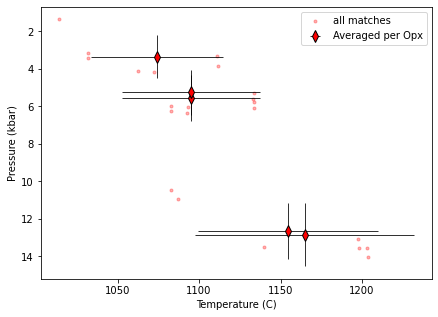

In [15]:
fig, ((ax1)) = plt.subplots(1, 1, figsize=(7, 5), sharex=True, sharey=True)

ax1.plot(All_Matches3['T_K_calc']-273.15, All_Matches3['P_kbar_calc'], 
         '.', color='red', alpha=0.3, label="all matches")

ax1.errorbar(Av_Matches3['Mean_T_K_calc']-273.15,  Av_Matches3['Mean_P_kbar_calc'],
             xerr=Av_Matches3['Std_T_K_calc'], 
             yerr=Av_Matches3['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, 
             mfc='red', ms=8, mec='k',  label='Averaged per Opx')

ax1.invert_yaxis()

ax1.legend()
ax1.set_xlabel('Temperature (C)')
ax1.set_ylabel('Pressure (kbar)')

## Example 6 - Specify both Kd Match and Kd Error.
- Instead of calculating Kd as a function of melt Si, which is the default, you can also specify a value of Kd Match and Kd error

In [16]:
Match4=pt.calculate_opx_liq_press_temp_matching(liq_comps=Liqs, opx_comps=Opxs,
                                        equationT="T_Put2008_eq28a",
                                        equationP="P_Put2008_eq29a", 
                                        Kd_Match=0.29, Kd_Err=0.12)
Av_Matches4=Match4['Av_PTs']
All_Matches4=Match4['All_PTs']

Considering 30 Liq-Opx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Finished!


In [17]:
All_Matches4

,Sample_ID_Opx,Sample_ID_Liq,P_kbar_calc,T_K_calc,Delta_Kd_Fe_Mg_Fe2,SiO2_Liq,Kd Eq (Put2008+-0.06),TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,Di_Opx,Mgno_OPX,ID_OPX,ln_Fm2Si2O6_liq,ln_FmAl2SiO6_liq,Kd_Fe_Mg_Fet,Kd_Fe_Mg_Fe2,Ideal_Kd,Mgno_Liq_noFe3,Mgno_Liq_Fe2
0,Opx1,Liquid1,3.327589,1384.287957,0.038418,51.1,Y,0.93,17.5,8.91,...,0.028142,0.82885,0,5.211708,-2.879647,0.251582,0.251582,0.304877,0.549218,0.549218
1,Opx1,Liquid2,4.153042,1345.601294,0.079307,51.5,N,1.19,19.2,8.70,...,0.028142,0.82885,0,5.421838,-2.962785,0.210693,0.210693,0.303256,0.505036,0.505036
2,Opx1,Liquid3,1.359126,1287.021849,0.060833,59.1,Y,0.54,19.1,5.22,...,0.028142,0.82885,0,6.070333,-2.627257,0.229167,0.229167,0.277184,0.526025,0.526025
3,Opx1,Liquid4,4.094837,1335.857253,0.061553,52.5,N,0.98,19.2,8.04,...,0.028142,0.82885,0,5.473969,-2.927640,0.228447,0.228447,0.300632,0.525239,0.525239
4,Opx1,Liquid6,3.822215,1384.668282,0.038418,51.3,Y,0.93,17.2,8.91,...,0.028142,0.82885,0,5.231702,-2.821164,0.251582,0.251582,0.305411,0.549218,0.549218
5,Opx2,Liquid1,13.567611,1476.378354,0.092854,51.1,N,0.93,17.5,8.91,...,0.068126,0.860725,1,4.992592,4.014336,0.197146,0.197146,0.304877,0.549218,0.549218
6,Opx2,Liquid3,10.911830,1360.462968,0.110419,59.1,N,0.54,19.1,5.22,...,0.068126,0.860725,1,5.851217,4.266726,0.179581,0.179581,0.277184,0.526025,0.526025
7,Opx2,Liquid4,13.978334,1418.251458,0.110984,52.5,N,0.98,19.2,8.04,...,0.068126,0.860725,1,5.254853,3.966344,0.179016,0.179016,0.300632,0.525239,0.525239
8,Opx2,Liquid6,14.052489,1476.777883,0.092854,51.3,N,0.93,17.2,8.91,...,0.068126,0.860725,1,5.012586,4.072819,0.197146,0.197146,0.305411,0.549218,0.549218
9,Opx3,Liquid1,13.073817,1470.604131,0.084013,51.1,N,0.93,17.5,8.91,...,0.074962,0.855382,2,4.993110,3.922681,0.205987,0.205987,0.304877,0.549218,0.549218
